<a href="https://colab.research.google.com/github/Amelrich/Capstone-Fall-2020/blob/kassie-preprocessing/padded_skipped_fourier_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
skipped_values = np.load('/content/drive/My Drive/capstone/skipped_values_fourier.npy')
consecutive_values = np.load('/content/drive/My Drive/capstone/consecutive_values_fourier.npy')

In [4]:
!pip install tslearn

**1. Clustering with Skipped Multi-Scale** 

In [5]:
from tslearn.clustering import TimeSeriesKMeans

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [6]:
#Skipped values
km_skipped = TimeSeriesKMeans(n_clusters=10, max_iter=5,random_state=0).fit(skipped_values)
clusters_skipped = km_skipped.predict(skipped_values)

In [7]:
#Dictionnaries with keys = clusters, values = list of the chunks in that cluster
dict_skipped = {}

for i in range(0,10):
  dict_skipped[i] = list()

for ind, arr in enumerate(skipped_values):
  dict_skipped[clusters_skipped[ind]].append(arr)

In [8]:
copy_skipped = dict_skipped

In [9]:
#Number of chunks in each cluster
clusters_n = [len(j) for j in dict_skipped.values()]
clusters_n

[499, 554, 277, 325, 308, 328, 424, 378, 512, 395]

In [10]:
#Create a dataframe with each column = mean of the values of each chunk in the cluster for that day
for i in range(0,10):
  #Concatenate all arrays into dataframe
  dict_skipped[i] = pd.DataFrame(np.concatenate(dict_skipped[i], axis=1)).replace(0,np.nan) 

for i in range(0,10):
  #Compute the mean for each scale
  col_con = dict_skipped[i].loc[:,0::3]
  col_2s = dict_skipped[i].loc[:,1::3]
  col_3s = dict_skipped[i].loc[:,2::3]

  dict_skipped[i] = pd.concat([col_con.mean(axis=1), col_2s.mean(axis=1), col_3s.mean(axis=1)], axis =1).replace(np.nan, 0)
  dict_skipped[i].columns = ['consecutive_mean', 'two_step_mean', 'three_step_mean']

In [11]:
#Plotting the results
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 5, figsize = (20,7))

for i in range(0,10):
  if i < 5:
    sns.lineplot(data = dict_skipped[i]['consecutive_mean'], ax = ax[0, int(i)])
    ax[0,int(i)].set_title('1st scale mean, cluster ' + str(i) + ' (n = '+ str(clusters_n[int(i)])+')')
    ax[0,int(i)].set_ylabel(' ')
    ax[0,int(i)].set_xlabel('days')
  
  else:
    sns.lineplot(data = dict_skipped[i]['consecutive_mean'], ax = ax[1, int(5-i)])
    ax[1,int(i-5)].set_title('1st scale mean, cluster ' + str(i) + ' (n = '+ str(clusters_n[int(i)])+')')
    ax[1,int(i-5)].set_ylabel(' ')
    ax[1,int(i-5)].set_xlabel('days')

plt.tight_layout()

Error in callback <function flush_figures at 0x7f09dd5ce2f0> (for post_execute):


KeyboardInterrupt: ignored

**2. Clustering with Consecutive Multi-Scale Values**

In [16]:
#Consecutive values
km_consecutive = TimeSeriesKMeans(n_clusters=10, metric="dtw", max_iter=5,random_state=0).fit(consecutive_values)
clusters_consecutive = km_consecutive.predict(consecutive_values)

In [17]:
#Dictionnaries with keys = clusters, values = list of the chunks in that cluster
dict_cons = {}

for i in range(0,10):
  dict_cons[i] = list()

for ind, arr in enumerate(consecutive_values):
  dict_cons[clusters_consecutive[ind]].append(arr)

In [18]:
#Number of chunks in each cluster
clusters_n_cons = [len(j) for j in dict_cons.values()]
clusters_n_cons

[539, 474, 322, 575, 374, 347, 290, 374, 384, 321]

In [19]:
#Create a dataframe with each column = mean of the values of each chunk in the cluster for that day
for i in range(0,10):
  #Concatenate all arrays into dataframe
  dict_cons[i] = pd.DataFrame(np.concatenate(dict_cons[i], axis=1)).replace(0,np.nan) 

for i in range(0,10):
  #Compute the mean for each scale
  col_20 = dict_cons[i].loc[:,0::3]
  col_40 = dict_cons[i].loc[:,1::3]
  col_60 = dict_cons[i].loc[:,2::3]

  dict_cons[i] = pd.concat([col_20.mean(axis=1), col_40.mean(axis=1), col_60.mean(axis=1)], axis =1).replace(np.nan, 0)
  dict_cons[i].columns = ['20d_mean', '40d_mean', '60d_mean']

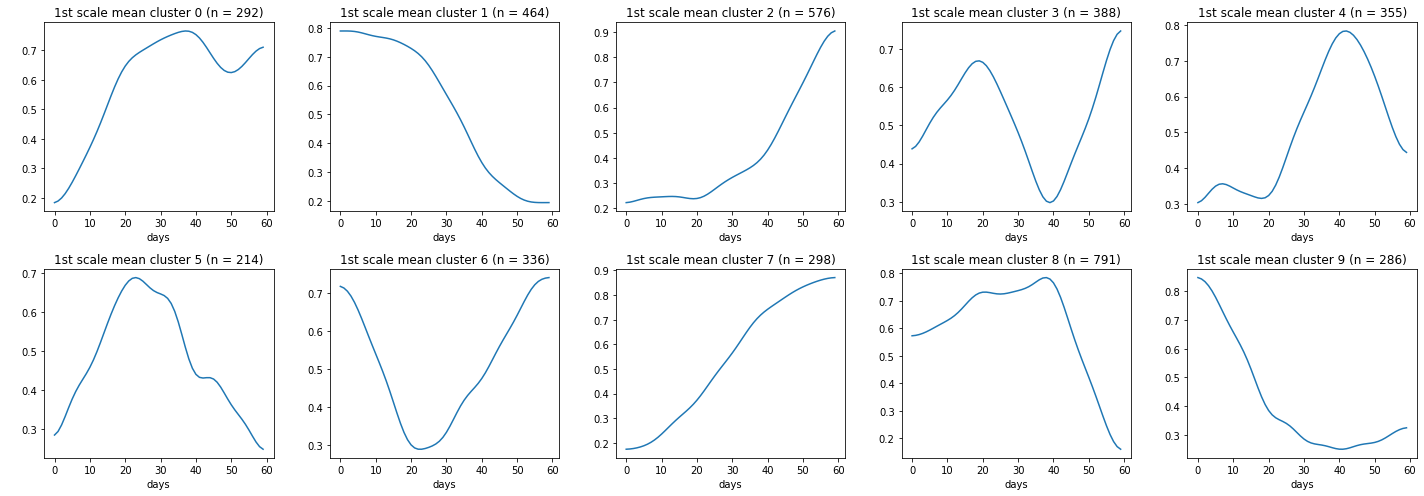

In [ ]:
#Plotting the results
fig, ax = plt.subplots(2, 5, figsize = (20,7))

for i in dict_cons.keys():
  if i < 5:
    sns.lineplot(data = dict_cons[i]['60d_mean'], ax = ax[0, int(i)])
    ax[0,int(i)].set_title('1st scale mean cluster ' + str(i) + ' (n = '+ str(clusters_n_cons[int(i)])+')')
    ax[0,int(i)].set_ylabel(' ')
    ax[0,int(i)].set_xlabel('days')

  else:
    sns.lineplot(data = dict_cons[i]['60d_mean'], ax = ax[1, int(5-i)])
    ax[1,int(i-5)].set_title('1st scale mean cluster ' + str(i) + ' (n = '+ str(clusters_n_cons[int(i)])+')')
    ax[1,int(i-5)].set_ylabel(' ')
    ax[1,int(i-5)].set_xlabel('days')

plt.tight_layout()

### Silhouette Visualizer

#### Skipped values

In [28]:
!pip install -U yellowbrick

     |████████████████████████████████| 276kB 2.8MB/s 
  Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1


In [42]:
def flatten(X):
  return np.array([np.concatenate((i[:,0], i[:,1], i[:,2]), axis=None) for i in X])

/usr/local/lib/python3.6/dist-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.6/dist-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.6/dist-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


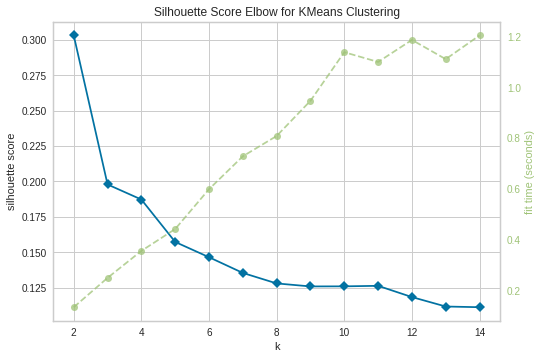

In [43]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15), metric = 'silhouette')

visualizer.fit(flatten(skipped_values))       # Fit the data to the visualizer
visualizer.show();

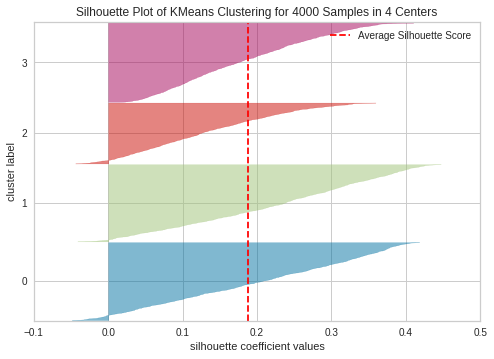

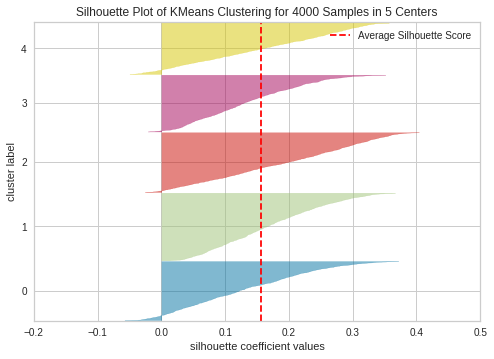

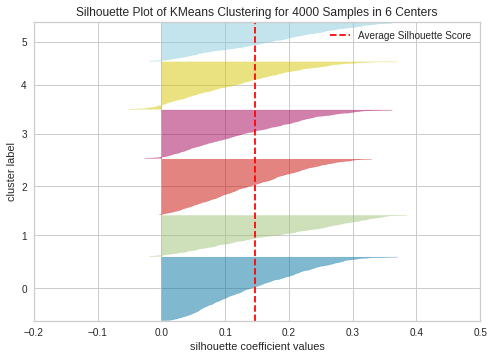

In [44]:
for k in range(4, 7):
  model_sil = KMeans(n_clusters=k)
  visualizer = SilhouetteVisualizer(model_sil, colors='yellowbrick')
  visualizer.fit(flatten(skipped_values)) 
  visualizer.show()

#### Consecutive *values*




/usr/local/lib/python3.6/dist-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.6/dist-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.6/dist-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


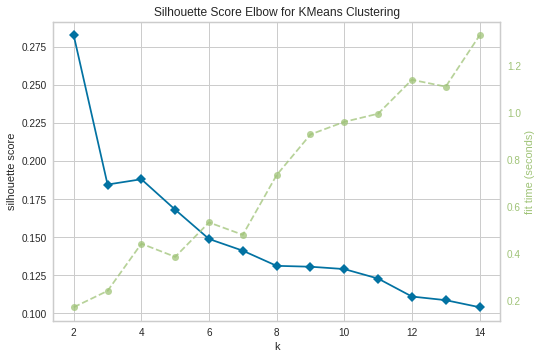

In [45]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15), metric = 'silhouette')

visualizer.fit(flatten(consecutive_values))       # Fit the data to the visualizer
visualizer.show();

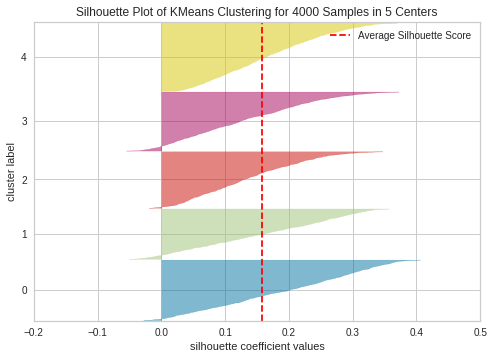

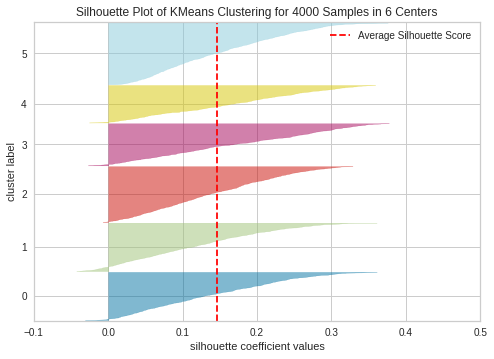

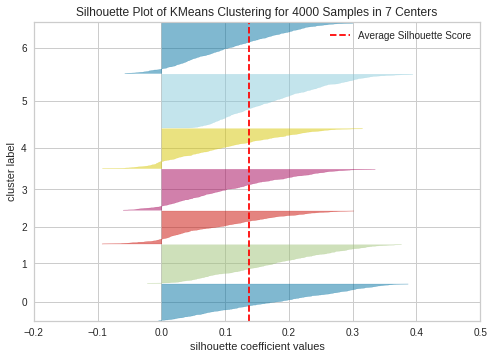

In [46]:
for k in range(5, 8):
  model_sil = KMeans(n_clusters=k)
  visualizer = SilhouetteVisualizer(model_sil, colors='yellowbrick')
  visualizer.fit(flatten(skipped_values)) 
  visualizer.show()